# NLP sequence with SLTM

See week 3 materials

# NLP text/word generation

## Create simple Corpus

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
words_len = len(word_index) + 1  # +1 because of OOV

print(words_len)
print(word_index)

263
{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'gra

In [12]:
print(corpus[0])
print(tokenizer.texts_to_sequences([corpus[0]])) # texts_to_sequences take argument as a list

in the town of athy one jeremy lanigan 
[4, 2, 66, 8, 67, 68, 69, 70]


## Create subsequences for the training

In [13]:
input_sequences = []
for line in corpus:
  token = tokenizer.texts_to_sequences([line])[0] # [0] because it is the first element in the list
  # get all the subsequences needed to predict the last token
  for i in range(1, len(token)): # from 1 to len(token) - 1
    n_gram_sequence = token[:i+1] # from 0 to i, here it will use the 0:i-1 elements as input X and the i element as the output Y (generated word)
    input_sequences.append(n_gram_sequence)


In [14]:
# Padding all subsequence in input_sequences to the longest subsequence
max_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_len, padding='pre')) # model take input as np.array

# create input, label
X, labels = input_sequences[:,:-1], input_sequences[:,-1] # X: 0 to -2, Y : -1
Y = tf.keras.utils.to_categorical(labels, num_classes=words_len) # turn labels (tokens) into a one-hot encoder


In [16]:
print(word_index['in'])
print(word_index['the'])
print(word_index['town'])
print(word_index['of'])
print(word_index['athy'])
print(word_index['one'])
print(word_index['jeremy'])
print(word_index['lanigan'])

4
2
66
8
67
68
69
70


In [24]:
print(X[6]) # fisrt sentence with the first 7 words

[ 0  0  0  4  2 66  8 67 68 69]


In [26]:
print(Y[7]) # the last word of first sentence in the form of onehot encoder (to be learned)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
  model = Sequential()
  model.add(Embedding(words_len, 120, input_length=max_len-1)) # -1 because the last element is the label not input
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(words_len, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X, Y, epochs=500, verbose=1)


Epoch 1/500
15/15 [==============================] - 0s 8ms/step - loss: 5.5676 - accuracy: 0.0110
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 5.5335 - accuracy: 0.0353
Epoch 3/500
15/15 [==============================] - 0s 8ms/step - loss: 5.4437 - accuracy: 0.0552
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 5.2496 - accuracy: 0.0552
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 5.1128 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 9ms/step - loss: 5.0390 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9940 - accuracy: 0.0574
Epoch 8/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9573 - accuracy: 0.0530
Epoch 9/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9181 - accuracy: 0.0596
Epoch 10/500
15/15 [==============================] - 0s 7ms/step - loss: 4.8724 - accuracy: 0.0662
Epoch 11/

In [32]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

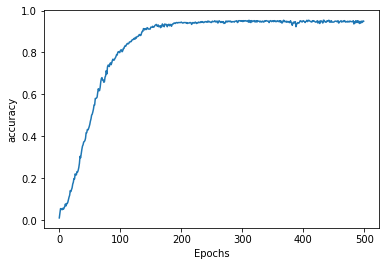

In [33]:
plot_graphs(history, 'accuracy')

# Use the trained text generator to generate word

In [37]:
original_text = "\nQing Zhang went to dublin"
words_predict = 50 # predict the next 50 words

for _ in range(words_predict):
  token = tokenizer.texts_to_sequences([original_text])[0] # generate sequence of the original text
  token = pad_sequences([token], maxlen=max_len, padding='pre') # pad the sequence like previous
  predicted = model.predict_classes(token, verbose=0) # predicted = the token of the predicted word
  output = ""
  # turn token back to word
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output = word
      break
  original_text += " " + output
print(original_text)



Qing Zhang went to dublin the chaneys at lanigans ball ball ball ball rose ball jig brooks ball rose academy glisten able round glisten glisten groups glisten able swore a hullabaloo your mcgilligan mcgilligan mcgilligan party new ball ball too all kinds ground weeks jig lanigans ball ball rose ball rose piper was call tea


# Character-based RNN

In [38]:
import tensorflow as tf

import numpy as np
import os
import time

In [39]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1122304/1115394 [==============================] - 0s 0us/step


In [41]:
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

In [42]:
print('Number of the characters in the text:', len(text) )

Number of the characters in the text: 1115394


In [43]:
print(text[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


## Vectorizing

In [52]:
vocab = sorted(set(text))
print("vocab: ", vocab)
print("totally {} unique char in the text".format(len(vocab)))

vocab:  ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
totally 65 unique char in the text


In [48]:
char2index = { c:i for i, c in enumerate(vocab)}
print(char2index)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}


In [51]:
index2char = np.array(vocab)
print(index2char)

['\n' ' ' '!' '$' '&' "'" ',' '-' '.' '3' ':' ';' '?' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [54]:
# get all the indexes
text_as_int = np.array([char2index[c] for c in text])
print(text_as_int)
print(len(text_as_int))

[18 47 56 ... 45  8  0]
1115394


## Convert text vector into tf.data.Dataset

In [55]:
seq_len = 100
examples_per_epoch = len(text) # one epoch one times the text go through 

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int) # vector to data.Dataset


In [58]:
print(len(char_dataset))

1115394


In [60]:
for i in char_dataset.take(5):
  print(index2char[i.numpy()])

F
i
r
s
t
